<center>
    <a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>    
</center>
<h1 align=center><font size = 5><em>t</em>-SNE</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>November 28, 2024</font>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

We will work with MNIST dataset.

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

In [3]:
X.shape

(70000, 784)

### Visualize the MNIST dataset using PCA

In [38]:

pca=PCA(n_components=2,random_state=42)

In [39]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [40]:
X_pca=pca.fit_transform(X_scaled)

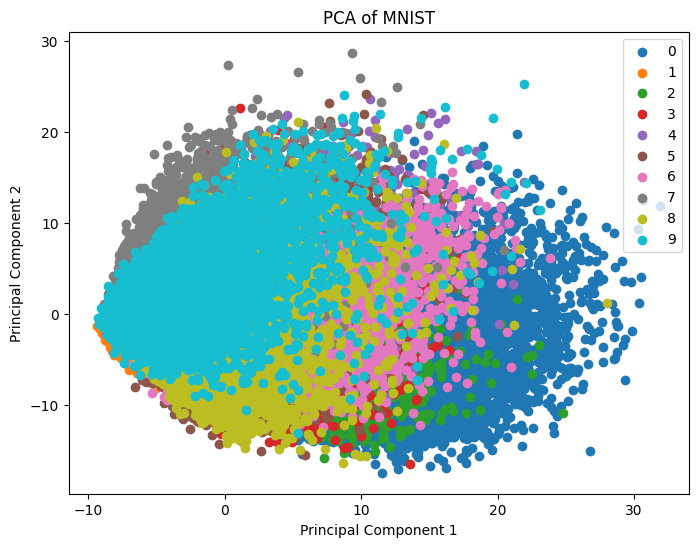

In [44]:
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(
        X_pca[y == target, 0], X_pca[y == target, 1], label=str(target), alpha=1
    )

plt.title("PCA of MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Re-run t-SNE with perplexity=5 and note how the resulting embedding is affected.

In [46]:
X_scaled.shape

(70000, 784)

In [52]:
sampled_X=X_scaled[:10000,:]
sampled_y=y[:10000]

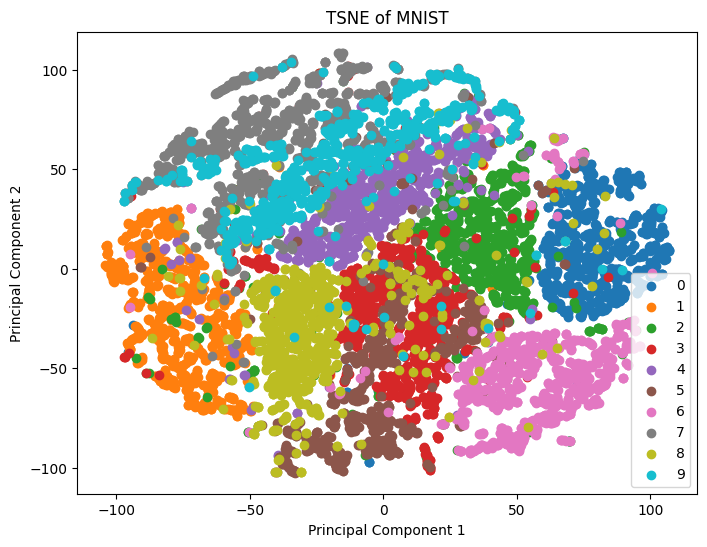

In [53]:
t_sne=TSNE(n_components=2,perplexity=5,random_state=42)
X_tsne=t_sne.fit_transform(sampled_X)

plt.figure(figsize=(8, 6))
for target in np.unique(sampled_y):
    plt.scatter(
        X_tsne[sampled_y == target, 0], X_tsne[sampled_y == target, 1], label=str(target), alpha=1
    )

plt.title("TSNE of MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Re-run t-SNE with perplexity=80 and learning_rate = 1000

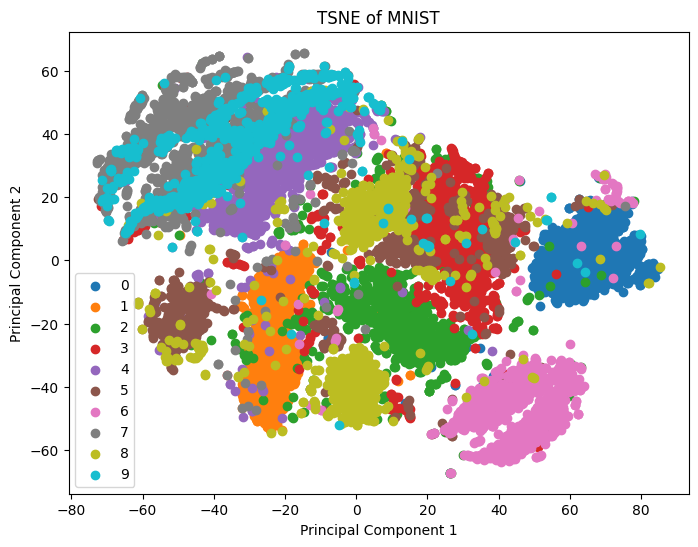

In [55]:
t_sne=TSNE(n_components=2,perplexity=80,learning_rate=1000,random_state=42)
X_tsne=t_sne.fit_transform(sampled_X)

plt.figure(figsize=(8, 6))
for target in np.unique(sampled_y):
    plt.scatter(
        X_tsne[sampled_y == target, 0], X_tsne[sampled_y == target, 1], label=str(target), alpha=1
    )

plt.title("TSNE of MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Re-run t-SNE with default perplexity and learning_rate = 1000

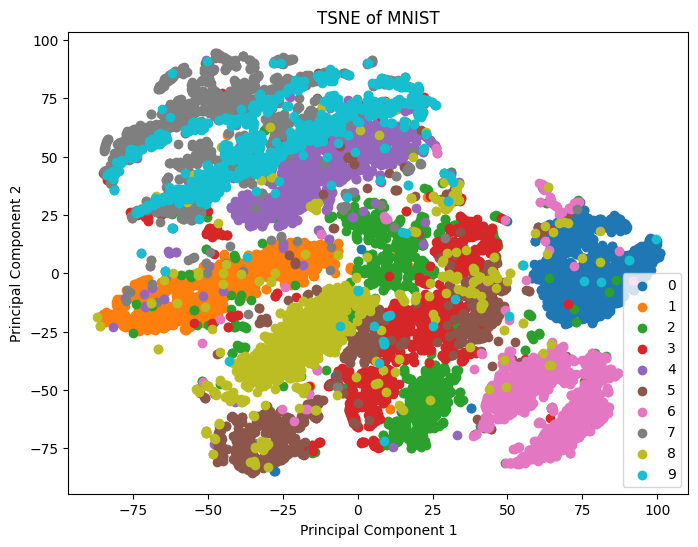

In [56]:
t_sne=TSNE(n_components=2,learning_rate=1000,random_state=42)
X_tsne=t_sne.fit_transform(sampled_X)

plt.figure(figsize=(8, 6))
for target in np.unique(sampled_y):
    plt.scatter(
        X_tsne[sampled_y == target, 0], X_tsne[sampled_y == target, 1], label=str(target), alpha=1
    )

plt.title("TSNE of MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### Limitations of t-SNE

While t-SNE is a powerful tool for visualizing high-dimensional data, it has several limitations:
- t-SNE struggles with very large datasets due to its computational cost.
- Due to random initialization, different runs can produce slightly different embeddings.
- t-SNE is not suitable for tasks like prediction or feature engineering.
- Results can vary significantly based on perplexity and learning rate.

In [57]:
data = loadmat("olivettifaces.mat")

FileNotFoundError: [Errno 2] No such file or directory: 'olivettifaces.mat'

In [ ]:
print(data.keys())

In [ ]:
for key, value in data.items():
    print(f"Key: {key}, Type: {type(value)}, Shape: {getattr(value, 'shape', 'N/A')}")

In [ ]:
X = data['faces']  # (4096, 400) - flattened images
X = X.T

In [ ]:
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
for key in ['p', 'u', 'v']:
    print(f"{key}: {data[key].shape}")
    print(data[key])